In [1]:
import torch

In [2]:
torch.cuda.is_available()

False

In [3]:
a = torch.rand(4) # image (3, 4)
b = torch.rand(4)
a.shape

torch.Size([4])

In [4]:
a, b

(tensor([0.7402, 0.9017, 0.0907, 0.2015]),
 tensor([0.1895, 0.6383, 0.7033, 0.6326]))

In [5]:
# X = (m,n) -> x = (n)

c = torch.stack([a, b], dim = 1)
print(c.shape)
print(c)

torch.Size([4, 2])
tensor([[0.7402, 0.1895],
        [0.9017, 0.6383],
        [0.0907, 0.7033],
        [0.2015, 0.6326]])


# Generate Dataset

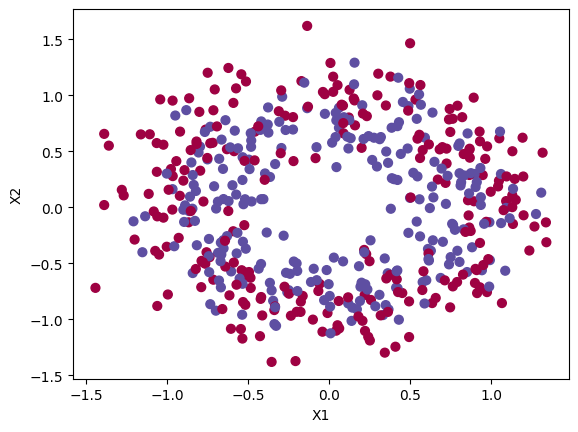

((500, 2), (500,))

In [89]:
from sklearn.datasets import make_circles, make_moons
import matplotlib.pyplot as plt
X, y = make_circles(n_samples=500, noise = 0.2, random_state= 42)

plt.scatter(X[:, 0], X[:, 1], c = y, s = 40, cmap = plt.cm.Spectral)
plt.xlabel( 'X1')
plt.ylabel( 'X2')
plt.show()
X.shape, y.shape

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [91]:
X_train = torch.from_numpy(X_train).type(torch.float32)
y_train = torch.from_numpy(y_train).type(torch.float32)
X_test = torch.from_numpy(X_test).type(torch.float32)
y_test = torch.from_numpy(y_test).type(torch.float32)
X_train.shape, y_train.shape, X_test.shape, y_test.shape


(torch.Size([400, 2]),
 torch.Size([400]),
 torch.Size([100, 2]),
 torch.Size([100]))

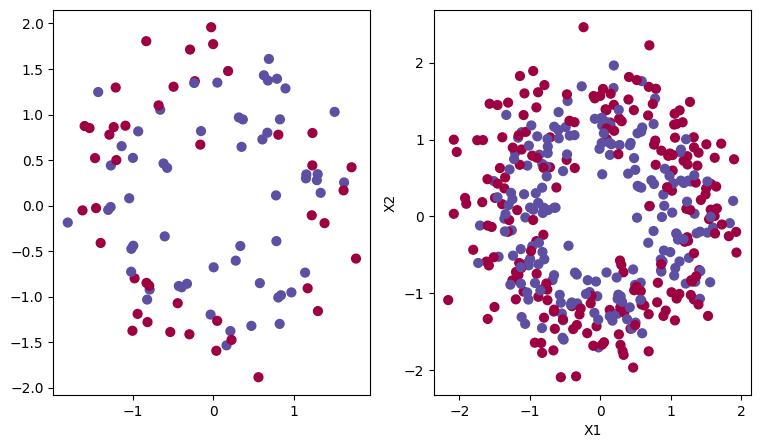

((500, 2), (500,))

In [92]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2, figsize=(9, 5))

ax[0].scatter(X_test[:, 0], X_test[:, 1], c = y_test, s = 40, cmap = plt.cm.Spectral)
ax[1].scatter(X_train[:, 0], X_train[:, 1], c = y_train, s = 40, cmap = plt.cm.Spectral)
plt.xlabel( 'X1')
plt.ylabel( 'X2')
plt.show()
X.shape, y.shape

# Build Logistic using torch

In [93]:
class Logistic_model(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.block_1 = torch.nn.Linear(2, 1)
        

    def forward(self, X):
        # X has shape (m, n)
        z1 = self.block_1(X) # (m, 1)
       
        return z1
    
    
model = Logistic_model()
model
    

Logistic_model(
  (block_1): Linear(in_features=2, out_features=1, bias=True)
)

In [94]:
model.block_1.state_dict()

OrderedDict([('weight', tensor([[0.2159, 0.3379]])),
             ('bias', tensor([0.6297]))])

In [95]:
model(X_train).shape

torch.Size([400, 1])

# Train model

In [96]:
x = torch.tensor(2.0, requires_grad=True)
y = x ** 2

y.backward(retain_graph=True)  # Allows multiple backward passes
print(x.grad)  # Should print 6

y.backward()  # Without retain_graph=True, this will cause an error
print(x.grad)  # Now it accumulates, printing 12

tensor(4.)
tensor(8.)


In [97]:
loss_function1 = torch.nn.BCELoss()
loss_function2 = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)    


In [98]:
epochs_count = []
train_loss_values = []
test_loss_values = []
epochs = 100

for epoch in range(epochs):
    model.train()

    # Forward pass
    z = model(X_train)
    y_hat_prob = torch.sigmoid(z).squeeze()

    # Compute loss
    training_loss1 = loss_function1(y_hat_prob, y_train)
    training_loss2 = loss_function2(z.squeeze(), y_train)

    # Calculate gradients
    optimizer.zero_grad()
    training_loss1.backward()

    # Update weights
    optimizer.step()

    model.eval()
    with torch.no_grad():
        # Forward pass
        z_test = model(X_test)
        y_hat_prob_test = torch.sigmoid(z_test).squeeze()

        # Compute loss
        test_loss1 = loss_function1(y_hat_prob_test, y_test)
        test_loss2 = loss_function2(z_test.squeeze(), y_test)
       
    # Store loss values
    epochs_count.append(epoch)
    train_loss_values.append(training_loss1.item())
    test_loss_values.append(test_loss1.item())

    # Print loss values
    print(f"Epoch {epoch+1}/{epochs}, Training Loss: {training_loss1.item():.4f} | {training_loss2.item():.4f} , Test Loss: {test_loss1.item():.4f} | {test_loss2.item():.4f}")

Epoch 1/100, Training Loss: 0.7770 | 0.7770 , Test Loss: 0.6962 | 0.6962
Epoch 2/100, Training Loss: 0.7732 | 0.7732 , Test Loss: 0.6946 | 0.6946
Epoch 3/100, Training Loss: 0.7696 | 0.7696 , Test Loss: 0.6932 | 0.6932
Epoch 4/100, Training Loss: 0.7661 | 0.7661 , Test Loss: 0.6918 | 0.6918
Epoch 5/100, Training Loss: 0.7628 | 0.7628 , Test Loss: 0.6905 | 0.6905
Epoch 6/100, Training Loss: 0.7596 | 0.7596 , Test Loss: 0.6893 | 0.6893
Epoch 7/100, Training Loss: 0.7565 | 0.7565 , Test Loss: 0.6882 | 0.6882
Epoch 8/100, Training Loss: 0.7536 | 0.7536 , Test Loss: 0.6872 | 0.6872
Epoch 9/100, Training Loss: 0.7507 | 0.7507 , Test Loss: 0.6862 | 0.6862
Epoch 10/100, Training Loss: 0.7480 | 0.7480 , Test Loss: 0.6854 | 0.6854
Epoch 11/100, Training Loss: 0.7455 | 0.7455 , Test Loss: 0.6846 | 0.6846
Epoch 12/100, Training Loss: 0.7430 | 0.7430 , Test Loss: 0.6839 | 0.6839
Epoch 13/100, Training Loss: 0.7406 | 0.7406 , Test Loss: 0.6832 | 0.6832
Epoch 14/100, Training Loss: 0.7383 | 0.7383 , 

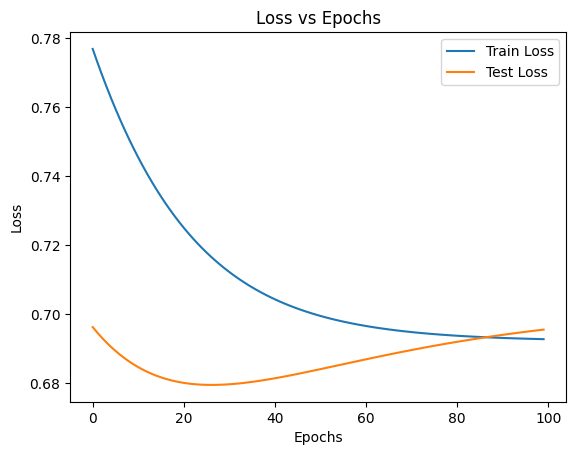

In [99]:
import matplotlib.pyplot as plt
plt.plot(train_loss_values, label='Train Loss')
plt.plot(test_loss_values, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()
plt.show()

## Plot

In [100]:
colors = ['green' if label == 1 else 'red' for label in y_train]
len(colors)

400

In [101]:
w0 = model.block_1.state_dict()['bias']
w1 = model.block_1.state_dict()['weight'][0][0]
w2 = model.block_1.state_dict()['weight'][0][1]

In [102]:
x1 = X_train[:, 0]
x2 = X_train[:, 1]
x1.shape, x2.shape

(torch.Size([400]), torch.Size([400]))

In [103]:
z = model(X_train)
y_prob = torch.sigmoid(z)
z.shape, y_prob.shape

(torch.Size([400, 1]), torch.Size([400, 1]))

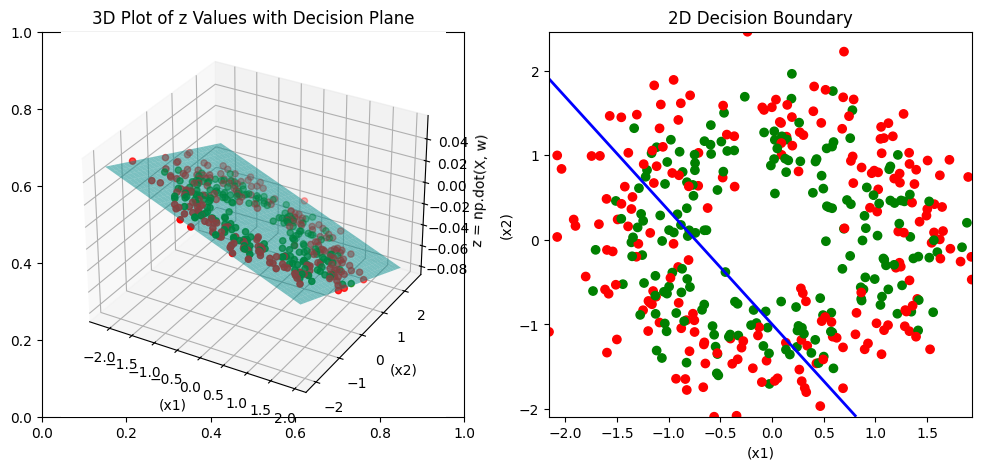

In [104]:
import numpy as np
# Set colors based on y values
colors = ['green' if label == 1 else 'red' for label in y_train]

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12 ,5))

### 🔹 Subplot 1: 3D Scatter + Decision Plane ###
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(x1, x2, z.detach().numpy().squeeze(), c=colors, marker='o', label="Data Points")

# Create a meshgrid for the decision plane
x1_range = torch.linspace(min(x1), max(x1), 30)
x2_range = torch.linspace(min(x2), max(x2), 30)
X1_mesh, X2_mesh = torch.meshgrid(x1_range, x2_range)

# Compute z-plane (decision boundary)
Z_plane = w0 + w1 * X1_mesh + w2 * X2_mesh # model(X)
ax1.plot_surface(X1_mesh, X2_mesh, Z_plane, color='cyan', alpha=0.5)


# Labels & Title
ax1.set_xlabel("(x1)")
ax1.set_ylabel("(x2)")
ax1.set_zlabel("z = np.dot(X, w)")
ax1.set_title("3D Plot of z Values with Decision Plane")

### 🔹 Subplot 2: 2D Decision Boundary ###
ax2 = axes[1]
ax2.scatter(x1, x2, c=colors, marker='o', label="Data Points")

# # Compute decision boundary where z = 0
# x1_decision = torch.linspace(min(x1), max(x1), 100)
# x2_decision = (-w0 - w1 * x1_decision) / w2  # Solving w0 + w1*x1 + w2*x2 = 0

ax2.contour(X1_mesh, X2_mesh, Z_plane, levels=[0], colors='blue', linewidths=2)
# Plot decision boundary
#ax2.plot(x1_decision, x2_decision, 'blue', linewidth=2, label="Decision Boundary (z=0)")

# Labels & Title
ax2.set_xlabel("(x1)")
ax2.set_ylabel("(x2)")
ax2.set_title("2D Decision Boundary")


# Show plot
plt.show()

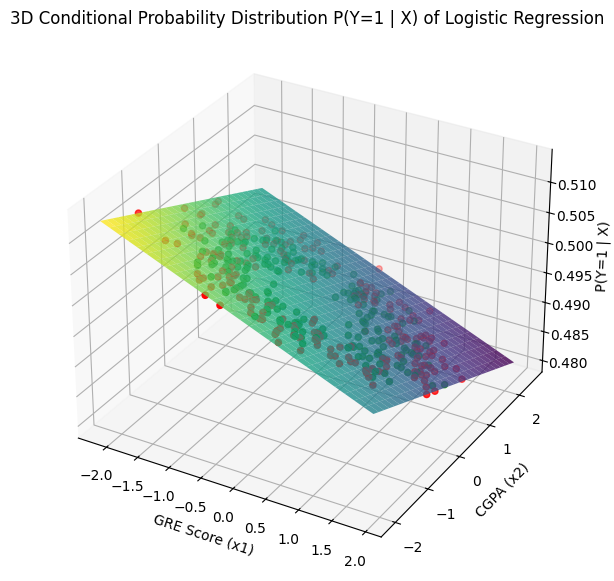

In [105]:
# Create a meshgrid for the decision plane
x1_range = np.linspace(min(x1), max(x1), 30)
x2_range = np.linspace(min(x2), max(x2), 30)
X1_mesh, X2_mesh = np.meshgrid(x1_range, x2_range)


# Compute z-plane (decision boundary)
Z_plane = w0 + w1 * X1_mesh + w2 * X2_mesh # model(X)
ax1.plot_surface(X1_mesh, X2_mesh, Z_plane, color='cyan', alpha=0.5)
P_Y_given_X = torch.sigmoid(Z_plane)  # Apply sigmoid

# Plot 3D surface
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1_mesh, X2_mesh, P_Y_given_X, cmap='viridis', alpha=0.8)
ax.scatter(x1, x2, y_prob.detach().numpy().squeeze(), c=colors, marker='o', label="Data Points")

# Labels
ax.set_xlabel("GRE Score (x1)")
ax.set_ylabel("CGPA (x2)")
ax.set_zlabel("P(Y=1 | X)")
ax.set_title("3D Conditional Probability Distribution P(Y=1 | X) of Logistic Regression")

plt.show()

# Build Neural Network and Activation Function

In [134]:
class Classification_model(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.block_1 = torch.nn.Linear(2, 20)
        self.block_2 = torch.nn.Linear(20, 20)
        self.block_3 = torch.nn.Linear(20, 1)
        

    def forward(self, X):
        # X has shape (m, n)
        z1 = self.block_1(X) # (m, 6) # w1 (6, 2)
        # Activation function
        a1 = torch.relu(z1) # (m, 6)
        z2 = self.block_2(a1) # (m, 1) # w2 (1, 6)
        a2 = torch.relu(z2) # (m, 1)
        z3 = self.block_3(a2) # (m, 1) # w3 (1, 6)

        return z3
    
model = Classification_model()
model

Classification_model(
  (block_1): Linear(in_features=2, out_features=20, bias=True)
  (block_2): Linear(in_features=20, out_features=20, bias=True)
  (block_3): Linear(in_features=20, out_features=1, bias=True)
)

In [135]:
loss_function1 = torch.nn.BCELoss()
loss_function2 = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.07)   

In [138]:
epochs_count = []
train_loss_values = []
test_loss_values = []
epochs = 2000

for epoch in range(epochs):
    model.train()

    # Forward pass
    z = model(X_train)
    y_hat_prob = torch.sigmoid(z).squeeze()

    # Compute loss
    training_loss1 = loss_function1(y_hat_prob, y_train)
    training_loss2 = loss_function2(z.squeeze(), y_train)

    # Calculate gradients
    optimizer.zero_grad()
    training_loss1.backward()

    # Update weights
    optimizer.step()

    model.eval()
    with torch.no_grad():
        # Forward pass
        z_test = model(X_test)
        y_hat_prob_test = torch.sigmoid(z_test).squeeze()

        # Compute loss
        test_loss1 = loss_function1(y_hat_prob_test, y_test)
        test_loss2 = loss_function2(z_test.squeeze(), y_test)
       
    # Store loss values
    epochs_count.append(epoch)
    train_loss_values.append(training_loss1.item())
    test_loss_values.append(test_loss1.item())

    # Print loss values
    print(f"Epoch {epoch+1}/{epochs}, Training Loss: {training_loss1.item():.4f} | {training_loss2.item():.4f} , Test Loss: {test_loss1.item():.4f} | {test_loss2.item():.4f}")

Epoch 1/2000, Training Loss: 0.5878 | 0.5878 , Test Loss: 0.6221 | 0.6221
Epoch 2/2000, Training Loss: 0.5878 | 0.5878 , Test Loss: 0.6221 | 0.6221
Epoch 3/2000, Training Loss: 0.5878 | 0.5878 , Test Loss: 0.6220 | 0.6220
Epoch 4/2000, Training Loss: 0.5877 | 0.5877 , Test Loss: 0.6220 | 0.6220
Epoch 5/2000, Training Loss: 0.5877 | 0.5877 , Test Loss: 0.6220 | 0.6220
Epoch 6/2000, Training Loss: 0.5877 | 0.5877 , Test Loss: 0.6220 | 0.6220
Epoch 7/2000, Training Loss: 0.5876 | 0.5876 , Test Loss: 0.6220 | 0.6220
Epoch 8/2000, Training Loss: 0.5876 | 0.5876 , Test Loss: 0.6220 | 0.6220
Epoch 9/2000, Training Loss: 0.5876 | 0.5876 , Test Loss: 0.6219 | 0.6219
Epoch 10/2000, Training Loss: 0.5876 | 0.5876 , Test Loss: 0.6219 | 0.6219
Epoch 11/2000, Training Loss: 0.5875 | 0.5875 , Test Loss: 0.6219 | 0.6219
Epoch 12/2000, Training Loss: 0.5875 | 0.5875 , Test Loss: 0.6219 | 0.6219
Epoch 13/2000, Training Loss: 0.5875 | 0.5875 , Test Loss: 0.6219 | 0.6219
Epoch 14/2000, Training Loss: 0.58

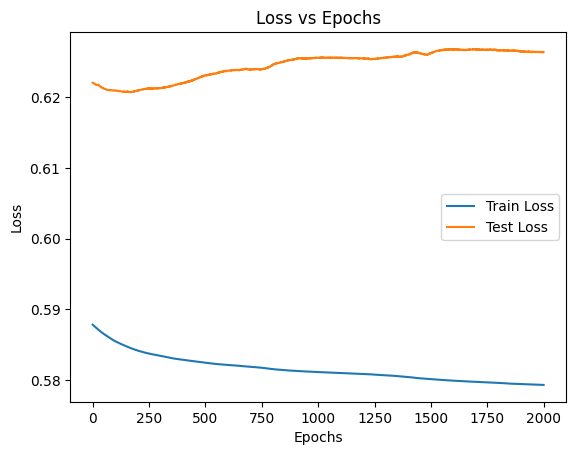

In [139]:
import matplotlib.pyplot as plt
plt.plot(train_loss_values, label='Train Loss')
plt.plot(test_loss_values, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()
plt.show()

## plot

In [148]:
x1 = X_train[:, 0]
x2 = X_train[:, 1]

z = model(X_train)
y_prob = torch.sigmoid(z)
z.shape, y_prob.shape

(torch.Size([400, 1]), torch.Size([400, 1]))

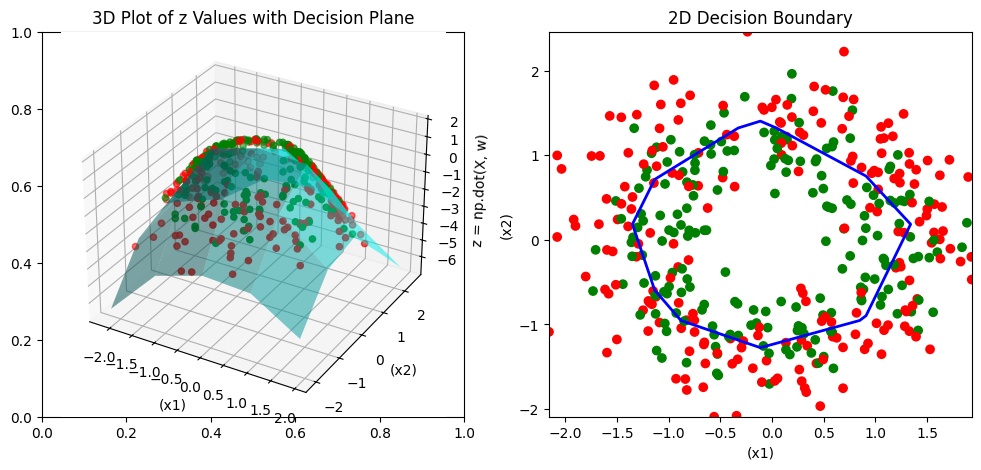

In [149]:
x1_range = torch.linspace(min(x1), max(x1), 5)
x2_range = torch.linspace(min(x2), max(x2), 5)
X1_mesh, X2_mesh = torch.meshgrid(x1_range, x2_range)
X1_mesh, X2_mesh

grid = torch.stack((X1_mesh, X2_mesh), dim=-1).reshape(-1, 2)

Z_mesh = model(grid)
Z_mesh = Z_mesh.reshape(X1_mesh.shape)

# Compute z-plane (decision boundary)

# Set colors based on y values
colors = ['green' if label == 1 else 'red' for label in y_train]

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12 ,5))

### 🔹 Subplot 1: 3D Scatter + Decision Plane ###
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(x1, x2, z.detach().numpy().squeeze(), c=colors, marker='o', label="Data Points")



# Compute z-plane (decision boundary)
ax1.plot_surface(X1_mesh, X2_mesh, Z_mesh.detach().numpy(), color='cyan', alpha=0.5)

# Labels & Title
ax1.set_xlabel("(x1)")
ax1.set_ylabel("(x2)")
ax1.set_zlabel("z = np.dot(X, w)")
ax1.set_title("3D Plot of z Values with Decision Plane")

### 🔹 Subplot 2: 2D Decision Boundary ###
ax2 = axes[1]
ax2.scatter(x1, x2, c=colors, marker='o', label="Data Points")

# # Compute decision boundary where z = 0
# x1_decision = torch.linspace(min(x1), max(x1), 100)
# x2_decision = (-w0 - w1 * x1_decision) / w2  # Solving w0 + w1*x1 + w2*x2 = 0

ax2.contour(X1_mesh, X2_mesh, Z_mesh.detach().numpy(), levels=[0], colors='blue', linewidths=2)
# Plot decision boundary
#ax2.plot(x1_decision, x2_decision, 'blue', linewidth=2, label="Decision Boundary (z=0)")

# Labels & Title
ax2.set_xlabel("(x1)")
ax2.set_ylabel("(x2)")
ax2.set_title("2D Decision Boundary")


# Show plot
plt.show()


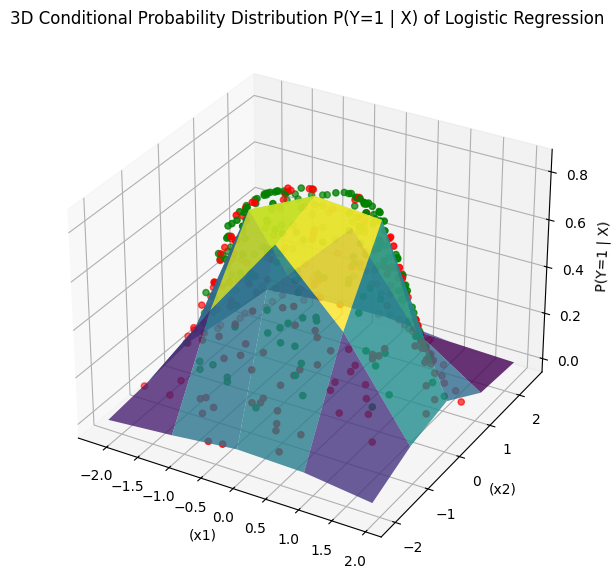

In [150]:
# Create a meshgrid for the decision plane
x1_range = torch.linspace(min(x1), max(x1), 5)
x2_range = torch.linspace(min(x2), max(x2), 5)
X1_mesh, X2_mesh = torch.meshgrid(x1_range, x2_range)

grid = torch.stack((X1_mesh, X2_mesh), dim=-1).reshape(-1, 2)

Z_mesh = model(grid)
Z_mesh = Z_mesh.reshape(X1_mesh.shape)

P_Y_given_X = torch.sigmoid(Z_mesh)  # Apply sigmoid


# Plot 3D surface
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1_mesh, X2_mesh, P_Y_given_X.detach().numpy(), cmap='viridis', alpha=0.8)
ax.scatter(x1, x2, y_prob.detach().numpy().squeeze(), c=colors, marker='o', label="Data Points")

# Labels
ax.set_xlabel("(x1)")
ax.set_ylabel("(x2)")
ax.set_zlabel("P(Y=1 | X)")
ax.set_title("3D Conditional Probability Distribution P(Y=1 | X) of Logistic Regression")

plt.show()